In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
dataset = load_boston()
samples, label, feature_names = dataset.data, dataset.target, dataset.feature_names

bostondf = pd.DataFrame(dataset.data)
bostondf.columns = dataset.feature_names
bostondf['Target price'] = dataset.target
bostondf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


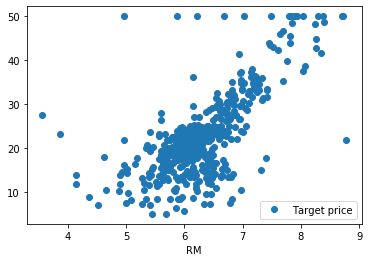

In [2]:
bostondf.plot(x='RM', y='Target price', style='o')


In [3]:
def prediction(X, coefficient, intercept):
    return X*coefficient + intercept

def cost_function(X, Y, coefficient, intercept):
    MSE = 0.0
    for i in range(len(X)):
        MSE += (Y[i] -(coefficient*X[i] + intercept))**2
    return MSE / len(X)
    

def update_weights(X, Y, coefficient, intercept, learning_rate):
    coefficient_derivative = 0
    intercept_derivative = 0
    for i in range(len(X)):
        coefficient_derivative += -2*X[i] *(Y[i] -(coefficient * X[i] + intercept))
        intercept_derivative += -2*(Y[i] - (coefficient* X[i] + intercept))
    coefficient -= (coefficient_derivative / len(X)) * learning_rate
    intercept -= (intercept_derivative / len(X)) * learning_rate
    return coefficient, intercept
    
def train(X, Y, coefficient, intercept, learning_rate, iteration):
    cost_hist = []
    for i in range(iteration):
        coefficient, intercept = update_weights(X, Y, coefficient, intercept, learning_rate)
        cost = cost_function(X, Y, coefficient, intercept)
        cost_hist.append(cost)
    return coefficient, intercept, cost_hist
    

In [4]:
X = bostondf.iloc[:, 5:6].values
Y = bostondf.iloc[:, 13:14].values
coefficient = 0.3
# coefficient, intercept, cost_history = train(X, Y, coefficient, intercept, learning_rate, iteration)
coefficient, intercept, cost_history = train(X, Y, coefficient, intercept=2, learning_rate=0.01, iteration=10001)


In [5]:
cost_history

[array([72.59720667]),
 array([60.96727513]),
 array([60.58066489]),
 array([60.56018189]),
 array([60.55162513]),
 array([60.54346052]),
 array([60.53531248]),
 array([60.52716876]),
 array([60.51902898]),
 array([60.51089311]),
 array([60.50276115]),
 array([60.4946331]),
 array([60.48650896]),
 array([60.47838873]),
 array([60.4702724]),
 array([60.46215998]),
 array([60.45405145]),
 array([60.44594683]),
 array([60.4378461]),
 array([60.42974927]),
 array([60.42165633]),
 array([60.41356729]),
 array([60.40548213]),
 array([60.39740087]),
 array([60.38932348]),
 array([60.38124999]),
 array([60.37318037]),
 array([60.36511464]),
 array([60.35705278]),
 array([60.34899481]),
 array([60.3409407]),
 array([60.33289047]),
 array([60.32484411]),
 array([60.31680162]),
 array([60.308763]),
 array([60.30072824]),
 array([60.29269735]),
 array([60.28467032]),
 array([60.27664715]),
 array([60.26862784]),
 array([60.26061238]),
 array([60.25260078]),
 array([60.24459303]),
 array([60.236589

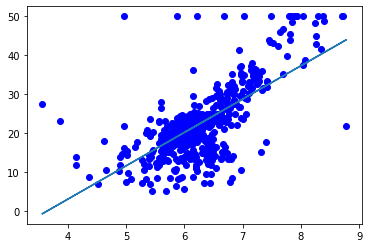

In [6]:
y_hat = X*coefficient + intercept
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat)
plt.show()
